In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

define a scalar value function f(x) that takes a single scalar x and returns a single scalar y

Scalar in General: In mathematics, a scalar is a single numeric value. It can be an integer, a floating-point number, a real number, or a complex number. Scalars are used to represent quantities that have magnitude but no direction, in contrast to vectors, which have both magnitude and direction.

In [5]:
def f(x):
  return 3*x**2 - 4*x + 5

In [6]:
f(3.0)

20.0

Can also get a sense of its shape with a plot. Quadratic.:

In [8]:
#feed in scalar values from range -5 to 5, not including 5, in steps of .25
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [11]:
#can call this function on this numpy array as well
#y's end up also applying f(x) on each one of these elemnents independently
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

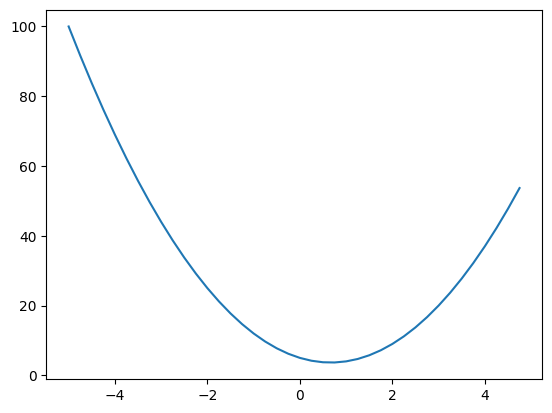

In [13]:
plt.plot(xs,ys)

Somewhere we fed in 3, and got back 20 (the y coordinate)

Now, think through what the derivative of this function at different points x of this function

Take this math exp above. 

Nobody in NN's actually writes out the exp for NN. Would be massive (10k terms).
Nobody derives the derivative.

Let's instead look at defintion of derivative and see what it's measuring.

Limit as h goes to 0 of (f(x+h) - f(x)) / h
Aka if you slightly bump up at some point x by smaller number h, how does the function respond (what is slope, go up, go down, by how much?) The slope of response at that point.

Can eval derivative by picking a small h. We would expect the below to affect slope slightly positively (greater than 20).

In [15]:
h = 0.001
x = 3.0
f(x+h)

20.014003000000002

How much func responded in the positive direction. Normalize by the run (rise/run) to get the slope (the numerical approx of the slope), because we have to make h very very small to converge to the exact amount. If we do too many 0's, at some point, we get an incorrect answer because of floating point error.  representation of all numbers in computer memory is finite. Converge toward right answer. 

As we adjust h to be smaller, derivative is slightly bigger. But basically it's 14.

In [34]:
h = 0.00000001
x = -3.0
(f(x+h) - f(x))/h

-22.00000039920269

At 3, the slope is 14. You can see that by taking 3x^2 -4x + 5 and differentiating it in our head. 3x^2 -> 6x - 4. Plug in 3, 18-4 = 14. So that's correct.  

Note:
Differentiation is the process of finding the derivative of a function, which gives us the slope of the tangent line to the function at any given point.

The power rule for differentiation states that if f(x) = ax^n, then f'(x) = anx^(n-1). Thus, 3x^2 goes to (2 x 3)x^(2-1) = 6x, while -4x goes to -4, and 5 to 0. 

(The derivative of the constant term 5 is 0 (since the derivative of a constant is always zero)


How about the slope at -3? Would you expect for the slope? Telling the exact value is really hard, but what's the sign of that slope?

If we slightly go in the positive direction at x, f(x) goes down, so func is negative. So that tells us we would get something below 20. Go ahead and change the 3.0 to negative above and test it out (should be about 22).

At some point, the slope/derivative would be 0. In this case, it's 2/3 roughly. this is when if we nudge in a +/- direction, the slope doesn't respond.  

Now let's get more complex.

Now, we have a function with output var d, that is a func of three scalar inputs (a,b,c). 

In [35]:
# let's get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In order to evaluate the derivative and learn what it's telling us, we're going to get a small value of h. Then, we fix inputs at some values that we're interested in. They are the point a, b, c that we are evaluating the derivative of d with respect to all a b and c at that point. 

d1 is that expression.

In [38]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
#der of d with respect to a
a += h #a going slightly higher means a slightly higher b, which is negative. Lower value of d2
#this (slightly greater than 4 or less than 4) tells us the sign of derivative
#value of function goes down
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h) #how much function increased when we bumped the specific input we're interested in by a tiny amount. 
#This is then normalized by h to get the slope.
#exact amount of slope is -3.  

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


You can also convince yourself that -3 is correct: if you have a*b + c, differentiating that with respect to a gives you just b, and the value of b is -3, which is the derivative that we have.

If we bump b a little bit in a positive direction, (b+=h), then the slope goes up, because a is positive, we'll be adding more to d. The slope of that addition is 2. BEcause d of d by db would give us a (differentiating with respect to b would give us a), and the value of a is 2. 


When you differentiate d with respect to b, you get a, which is 2.0. This means that for a small change in b, the change in d will be proportional to a. This means that for a small change in b, d changes by 2.0 times that amount. In other words, the rate of change of d with respect to b is 2.


When we bump c (c+=h),c becomes slightly higher, which makes the function slightly higher by the exact amount that we added to c, which tells us that the slope is 1. That's the rate at which d will increase as we change c. Even if we make h=1 and not 0.00001, the slope equals 1, so it is always approaching 1 and never goes over. 



In [56]:
h = 1

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
#derivative of d with respect to a
c += h 
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h) #how much function increased when we bumped the specific input we're interested in by a tiny amount. 
#This is then normalized by h to get the slope.

d1 4.0
d2 5.0
slope 1.0


NN's need massive data structures to build out these expressions. That's what we'll build out now. We're going to build out the value object in the readme. 

In [426]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''): #op = what created the value):
    self.data = data
    self.grad = 0.0 #0 means no effect on output (assuming this). Changing this does not affect loss func
    self._prev = set(_children) #set of children for efficiency. Is tuple above. 
    self.backward = lambda : None
      #^fucntion that does piece of chain rule at each little node that took inputs and produced outputs, store 
          #how we are going to chain the output gradient into the input gradients
    self._op = _op
    self.label=label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
      print("calling add")
      out = Value(self.data + other.data, (self, other), '+') #feed in children of the value
      print("out ", out)
#on the bottom example, out is b (= a+a).
#problem is we're setting the gradient (self and other are the same) twice.
      
      def _backward():           #chain rule: take local derivative x the global derivative (of final output of exp) with respect to out
          self.grad += 1.0 * out.grad    #addition
          print("self.grad = ", self.grad)
          other.grad += 1.0 * out.grad      #out.grad will be copied into self.grad and others.grad for addition
          print("other.grad = ", other.grad)
      out._backward = _backward
      return out
  def __mul__(self, other):
      out = Value(self.data * other.data, (self, other), '*')

      def _backward():
          self.grad = other.data * out.grad    #local derivative * out.grad
          other.grad = self.data * out.grad
      out._backward = _backward
      return out
      
  #def exp(self):

  def tanh(self):
      x = self.data
      t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
      
#children of node, one output. Self is a tuple:
      out = Value(t, (self, ), 'tanh')

      def _backward():
          #we have out.grad, we want to chain it into self.grad
          #self.grad will be the local der of this operation above (tanh), gradient has to be multiplied -> 
          #chain rule; outgrad is chained through the local grad into self.grad
#1-tanh(x**2) -> 1-t**2 is local der
          self.grad = (1-t**2) * out.grad
      out._backward = _backward
      return out

def backward(self):
    o.grad = 1.0 #init set to 0

    topo = []
    visited = set()
    def build_topo(v):   #start at root node, for us is o
        if v not in visited:
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
        node._backward()
#o only adds itself to topo list after all of the children have been processed
#just calling ._backward to all of the topological nodes in order

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e=a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L

#python internally calls a.__add__(b). b is other, and self is a
#a * b + c  #a.__mul__(b)).__add__(c)


calling add
out  Value(data=4.0)


Value(data=-8.0)

Class value takes a single scalar value that it wraps and keeps track of. 
Use double underscore methods to define operators for these objects.

repr allows us to print a nicer looking expression in python

In [389]:
d._prev, d._op

({Value(data=-6.0), Value(data=10.0)}, '+')

Because these expressions will get a lot larger, we need a way to express this.

In [390]:
!pip install graphviz
!export PATH="/usr/local/opt/graphviz/bin:$PATH"


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [391]:
from graphviz import Digraph #graphviz is an opensource vizualization software. We are building out this graph in graphviz API. 

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root): #creating op nodes (not Value objects)
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad % .4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

do the following to ensure graphviz works below:
-
- ``sh
brew install graphviz
``
- ``sh
export PATH="/usr/local/opt/graphviz/bin:$PATH"
``
- ``sh
source ~/.bashrc
``


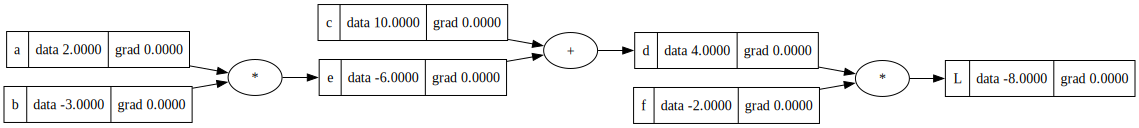

In [392]:
draw_dot(L)

dL/dc : derivative of L with respect to C. Also will derive dL by dE. 


How do we derive dL by dC?


We already know derivative of L with respect to d. So we know how L is sensitive to d. But how is L sensitive to C?
So if we wiggle C, how does that impact L through d? if know impact c on d and d on l, should be able to put it together to figure out how c impacts l


dd/dc?

d = c + e -> differentiating c+e with respect to c, gives you 1 + 0. 

f(x+h) - f(x) / h

dd/dc = ((c+h + e) - ( c + e )) / h

(c + h + e -c -e) / h -> h/h = 1.0

These are the local derivatives. the + node only nodes the derivatives of d with respect to e, and d with respect to c. And it knows
that it took c and e and added them and made d. This little + node can be embedded in a massive graph. 

Now we know how to derive c and e from d, and d from c, but how do we put it all together?
Answer: the chain rule.

Chain rule:

- If a vairable z depends on the variable y, which iteself depends on the variable x, (that is, y and z are dependent variables, then z depends on x as well, via the intermediate variable y. In this case, the chain rule is expressed as dz/dx = dz/dy * dy/dx

- For our use case, dL/dc = dL/dD * dD/

- This is how we chain these derivatives together, correctly. To differentiate through a function composition, we have to apply a multiplication of those derivatives.

- Intuitively, knowign the instantaneous rate of change of z relative to y and that of y relative to x allows one to calculate the instantaenous rate of achange of z relative to x as the product of the two rates of change

- If a car travels 2x as fast as a bicycle and the bicycle is 4x as fast as the walking man, then the car travels 2x4=8x as fast as the man. If we use the chain rule: let z, y, and x be the variable positions of the car, bicycle, and the walking man. The rate of change of the relative poisitons of the car and the bicycle is dz/dy=2. Then, dy/dx=4. So the rate of change of the relative positions of the car and the walking man is dz/dx = dz/dy * dy/dx = 2 * 4 = 8

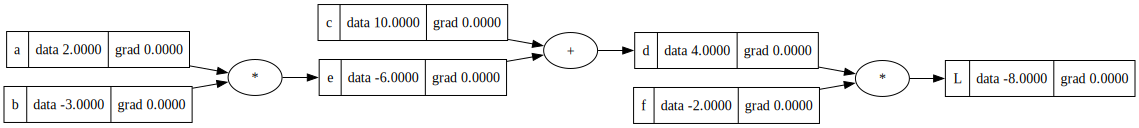

In [393]:
draw_dot(L)

In [394]:
c.grad = -2.0 #-2 * 1
e.grad = -2.0

dd/de = 1.0
dd/dc = 1.0
local derivatives are 1
d = c + e

KNOW: 
dL / dd = -2
dd / dc = 1

WANT:
dL / dc = (dL / dd) * (dd / dc)

A (+) node is routes the gradient because the (+) node gradients are just 1
So in the chain rule, 1 x dL/dd = dL/dd, so the derivative just gets routed to c and e

Backpropogating signal that is flowing backwards through the graph, carrying the info of what the dL with respect to all the intermediate nodes, a (+) node simply distributes a derivative to all its children


In [395]:
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

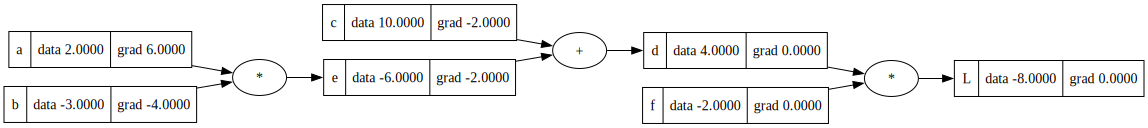

In [396]:
draw_dot(L)

In [397]:
L.grad = 1.0
#F.GRAD is the value of d, d.grad is the value of f
f.grad = 4.0
d.grad = -2.0

Let's recap. We have been able to build out math expressions with + and * using scalar values. We can do a forward pass with multiple inputs going into a math expression that produces a single output L. The graph visualizes the forward pass. Now, we want to do backpropogation, where we reverse and calculate the gradient on each intermediate value. Really computing for every value the derivative of that node with respect to L. 

Derivative of L with respect to L is just 1. With respect to f, d, c, e, b, a. In NN, very interested in derivative of Loss function L with respect to the weights of a neural network. Some of these will represent the weights of the neural net. Interested in how weights (leaf nodes) are affecting the loss function as it changes. Can't use derivative of L with data because data is fixed, but weights aren't. 

Let's fill in the gradients. Start at the end with L. What is derivative of L with respect to L? If I change L by tiny amount h, how much does L change? It changes by h. Proportional. So gradient is 1. 


In [398]:
def lol():
    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data
    #use.data because they're floats

    a = Value(2.0, label='a')
    #a.data += h -> a.grad is 6
    b = Value(-3.0, label='b')
    #b.data += h -> -4
    c = Value(10.0, label='c')
    #c.data += h 
                                #when we do  c.data += h, we expect to see -2 because of the chain rule -> dL/dc = -2.0(dd) * 1 (dc)
    e= a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')  #inline gradient check: deriving backpropogation getting 
                                    #deriviative with respect to all intermediate results
                                    #Numerical gradient is estimating it using small step size
    L = d * f; L.label = 'L'
    L2 = L.data 

    print((L2 - L1)/h)
#rise over run -> change in L over 
#should print derivative of L with respect to  a because a is what we bumped by h. Answer is 6. 
# base case would be adding h to L
#Adding a small amount (h) to a -> measures L with respect to a



#when testing derivatives, ply in + h to any of the value objects in L2. For example, if finding der of L with respect to f,
#add h to -2.0 in f's value object. Since the derivative of 
lol()

0.0


Micro Conclusion for manual backpropogation:

- iterated through all nodes 1 by 1 and locally applied the chain rule
- We always know what the derivative of L is with respect to the local output
- The output was produced through some operation, and we have the pointers to its children nodes
- In this op, we know what the local derivatives are, and we just multiply them onto the derivative
- We just go through and recursively multiply on the local derivatives
- Backpropagation is just a recursive application of chain rule backwards through the computational graph

In [399]:
#one step of optimization, gradients give us power because we know how to influence the final outcome.

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

#re-run forward pass
e= a * b
d = e + c
L = d * f
print(L.data)
#-6 goes up from -8


-7.286496


### Paste in cnn photo 

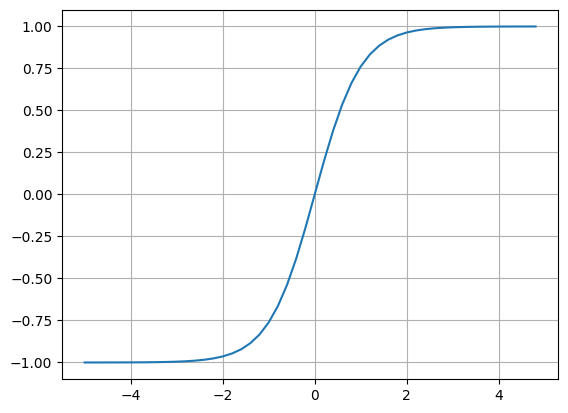

In [400]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

inputs as they come in get squashed on the y coordinate, only goes up to 1 and plateaus. 
cap it smoothly to 1 and -1, this is an activation function. 
What comes out of this neuron is the activation applied to the dot product of the weights and the inputs (see cell image)

calling add
out  Value(data=-6.0)
calling add
out  Value(data=0.8813735870195432)


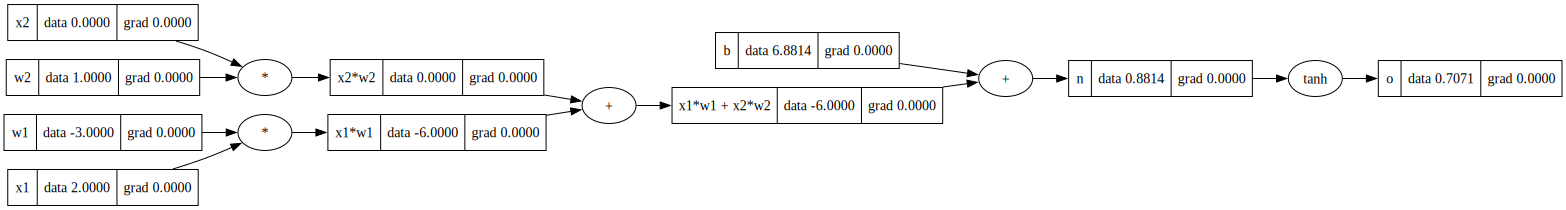

In [428]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2; the synaptec strengths of each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron b; 
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b; doing it in small steps so we have pointers to the intermediate steps
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

#output -> o; need to write tanh. Implement this tanh function because tanh is a hyperbolic function,
#and we only have so far implemented a plus and a times. Can't make a tanh out of just + and x. 
#Also need exponentiation and division:

o = n.tanh(); o.label = 'o'

draw_dot(o)

We don't have to have the most atomic pieces in this value object. We can create functions at arbitrary points of abstraction. they can be complicated or simple
What matters is we know how to differentiate through any one function. So we take some inputs and we make an output. 
Only thing that matters is you know how to create the local derivative of how the inputs affect the output
Going to cluster up the whole expression and direclty implement tanh. Now tanh is our micrograd supported node here as our operation. As long as we know the derivative of tanh, we'll be able to backpropogate through it.

See tanh in action. Increase bias to see what's flowing into tanh. Increase bias to hit the tail of tanh. This is called "squashing". 

What is the derivative of o with respect to all of the inputs? In teh typical nn setting, we care about the derivative of the neurons on teh weights specifically (w1 , w2), because that's what we change in the optimize in the optimization. Also remember typically there is a much bigger puzzle of neurons as opposed to just the one here. Eventually there's a loss function that measures the accuracy of the neural net, and that's when we backpropogate with respect to that accuracy and try to increase it.

What is the derivative of o with respect to o? the base case...
The gradient is 1.0. 

To backpropogate with tanh, we need to know the derivative of tanh. If we have that o is tanh of n, then what is d/o by d/n?
- Can do calculus on this.
- from wikipedia: do/dn = 1-tanh(n)**2 = 1 - o**2

In [412]:
o.grad = 1.0
print(o.data)
1-o.data**2
# the local derivative of the tanh function is .5, or do/dn
n.grad = 0.5

#calc next derative. a plus is simply a distributor of gradient. This gradient will flow to both of these equally.

#The local derivative of the + is 1 for every one of its nodes. 1 * .5 = .
#thus,
x1w1x2w2.grad = 0.5
b.grad = 0.5

#.5 distributes to both x1w1 and x2w2 because of +
x1w1.grad = 0.5
x2w2.grad = 0.5

x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

#derivative always tells us the influence of data on the final output.
#If i wiggle w2, how is the output changing? it's not, because it's getting multiplied by 0. 
#because it's not changing; there is no derivative, thus w2 grad = 0.

#the local derivative of * with respect to x1 is w1. 
x1.grad = w1.data * x1w1.grad #do more research on this
w1.grad = x1.data * x1w1.grad

0.7071067811865476


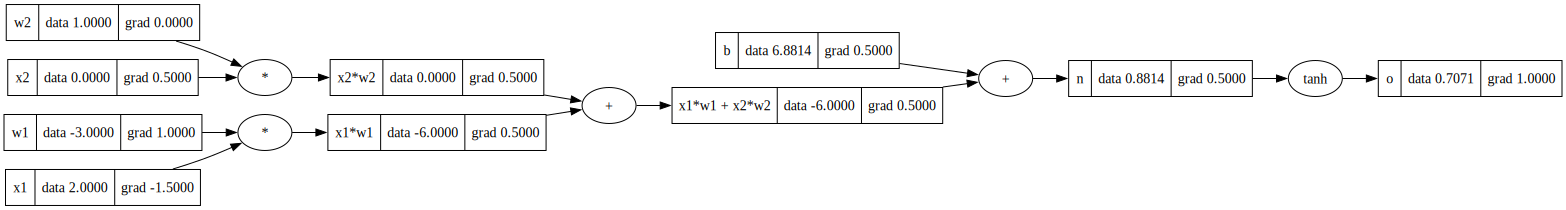

In [420]:
draw_dot(o)

In [414]:
o._backward()

In [406]:
n._backward()
#b._backward() init to empty func

In [407]:
x1w1x2w2._backward()

In [408]:
x1w1._backward()
x2w2._backward()

Now, we get the same thing, but doing it through code. Not manually. 
We have to forward pass through everything after it and backprop through everything before it before we backprop a given node
Look at topological sort -> lays out nodes so that all edges go one way (left-> right). Let's implement

[Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

calling add
out  Value(data=6.0)
self.grad =  0.0
other.grad =  0.0


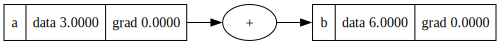

In [424]:
a = Value(3.0, label='a')
b = a + a    ; b.label = 'b'
b._backward()
draw_dot(b)
#two arrows on top of each other. forward pass works. Gradient not correct
#the derivative with respec to a should be 2, 1+1.

calling add
out  Value(data=1.0)


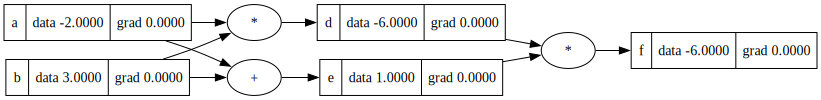

In [427]:
a = Value(-2.0, label='a')
b = Value(3.0, label= 'b')
d = a * b     ; d.label = 'd'
e = a + b     ; e.label = 'e'
f = d * e     ; f.label = 'f'

f.backward()

draw_dot(f)

#look at the multivariable case of the chain rule -> solution: accumulate gradients. Instead of setting gradients, simply do +=. Deposit
#gradients from each branch, even if the same var. And then they add on top of each other. 